In [1]:
!pip install pickle5
!pip install pyLDAvis

     |████████████████████████████████| 256 kB 27.6 MB/s 
     |████████████████████████████████| 1.7 MB 22.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=dd71593cfcf35b134ae970be0f04de5fb3413133103060f813da07a7f6b11efc
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [2]:

import pandas as pd
import numpy as np
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from gensim.matutils import corpus2csc
from ast import literal_eval
import os
import pickle5 as pickle

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
input_path = '/content/drive/My Drive/ColabNotebooks/final_project/'
file_name = 'df_job_final.pkl'
path = os.path.join(input_path, file_name)
df_jobs = pickle.load(open(path, "rb"))

In [5]:
df_jobs.head

<bound method NDFrame.head of                                                    title   department  \
0                      account executive - washington dc        sales   
1                                    bill review manager          nan   
2                                  head of content (m/f)   androidpit   
3                customer service associate - part time           nan   
4      asp.net developer job opportunity at united st...          nan   
...                                                  ...          ...   
10668                                           rn / lpn  health care   
10669                            ultrasound technologist          nan   
10670                          nys licensed psychologist          nan   
10671                  lead pharmacy technician: billing  health care   
10672                       experienced a level mechanic       retail   

                                             description  \
0      the company: esri – enviro

In [6]:
df_jobs_nan = df_jobs[df_jobs['department'] == 'nan']
df_jobs = df_jobs[df_jobs['department'] != 'nan']
df_jobs['department'].value_counts()

information technology       674
business services            573
sales                        324
biotech & pharmaceuticals    316
finance                      262
                            ... 
camp lakodia                   1
dermatology                    1
english language               1
client                         1
agriculture & forestry         1
Name: department, Length: 726, dtype: int64

In [7]:
def get_corpus(data):
  
  data_lemmatized = data.tolist()
  # Create Dictionary 
  id2word = corpora.Dictionary(data_lemmatized)  
  # Create Corpus 
  texts = data_lemmatized  
  # Term Document Frequency 
  corpus = [id2word.doc2bow(text) for text in texts]  
  
  return corpus, id2word, id2word, data_lemmatized

In [8]:
corpus_final, id2word_final, id2word_final, data_lemmatized_final = get_corpus(df_jobs['description_combined'])

In [9]:
##choose the best topic model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None 

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(
                              corpus=corpus,
                              id2word=id2word_final,
                              chunksize=chunksize,
                              alpha='auto',
                              #eta='auto',
                              iterations=iterations,
                              num_topics=num_topics,
                              passes=passes,
                              random_state = 0,
                              eval_every=eval_every)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [10]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_final, corpus=corpus_final, texts=data_lemmatized_final, start=2, limit=30, step=1)

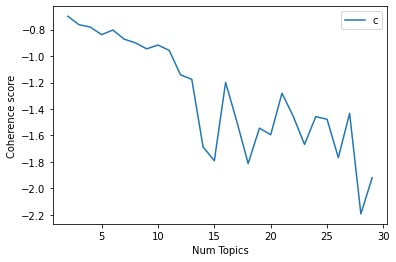

In [11]:
# Show graph
limit=30; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -0.6996
Num Topics = 3  has Coherence Value of -0.7636
Num Topics = 4  has Coherence Value of -0.7814
Num Topics = 5  has Coherence Value of -0.8388
Num Topics = 6  has Coherence Value of -0.8036
Num Topics = 7  has Coherence Value of -0.8724
Num Topics = 8  has Coherence Value of -0.9006
Num Topics = 9  has Coherence Value of -0.9457
Num Topics = 10  has Coherence Value of -0.9171
Num Topics = 11  has Coherence Value of -0.9576
Num Topics = 12  has Coherence Value of -1.1423
Num Topics = 13  has Coherence Value of -1.1759
Num Topics = 14  has Coherence Value of -1.686
Num Topics = 15  has Coherence Value of -1.7909
Num Topics = 16  has Coherence Value of -1.1994
Num Topics = 17  has Coherence Value of -1.496
Num Topics = 18  has Coherence Value of -1.8117
Num Topics = 19  has Coherence Value of -1.5444
Num Topics = 20  has Coherence Value of -1.5945
Num Topics = 21  has Coherence Value of -1.2809
Num Topics = 22  has Coherence Value of -1.4549
Nu

In [13]:
import torch
import torchvision
model_10 = model_list[8]
model_save_name = 'lda10_final.model'
path = F"/content/drive/My Drive/ColabNotebooks/final_project/{model_save_name}" 
torch.save(model_10, path)

In [ ]:
model_save_name = 'lda16_final.model'
path = F"/content/drive/My Drive/ColabNotebooks/final_project/{model_save_name}" 
model_16 = torch.load(path)

In [ ]:
df_jobs.shape

(5612, 10)

In [15]:
df_lda = np.zeros(shape=(5612,10))
for i, row in enumerate(model_10[corpus_final]):
  for  j, (topic_num, prop_topic) in enumerate(row):
    df_lda[i, topic_num] = prop_topic
df_lda

array([[0.        , 0.        , 0.99647063, ..., 0.        , 0.        ,
        0.        ],
       [0.4561494 , 0.        , 0.3008672 , ..., 0.23497863, 0.        ,
        0.        ],
       [0.17536114, 0.        , 0.38473529, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29160812, 0.20185423, 0.        , ..., 0.        , 0.01010298,
        0.01121573],
       [0.07235093, 0.01453627, 0.0197187 , ..., 0.02183078, 0.02023369,
        0.76271117],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])